In [42]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

# Define the generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100+1, 128), # Adjusted input dimension to 101
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(128),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(512),
            nn.Linear(512, 45),  # Output 40 features, not 41
            nn.Tanh()
        )
    def forward(self, x, label):
        # print(f'Generator x shape: {x.shape}, label shape: {label.shape}')  # Debugging line
        # Concatenate label to the noise
        x = torch.cat([x, label], dim=1)
        return self.model(x)

# Define the discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(46, 512),  # Corrected input dimension
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x, label):
        # print(f'Discriminator x shape: {x.shape}, label shape: {label.shape}')  # Debugging line
        # Concatenate label to the features
        x = torch.cat([x, label], dim=1)
        # print(f'Concatenated shape: {x.shape}')  # Add this line for debugging
        return self.model(x)


# Instantiate models and optimizers
generator = Generator()
discriminator = Discriminator()

# Loss function
criterion = nn.BCELoss()

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Rest of the training loop will be similar to typical PyTorch training loops


In [43]:
data = pd.read_csv('/content/custom_preprocess_v3.csv')

In [44]:
data.columns

Index(['amount', 'createdAt', 'recipient_accountNumber', 'recipient_full_name',
       'sender_full_name', 'reviewed', 'reported', 'day', 'month', 'year',
       'weekofyear', 'is_weekend', 'day_of_week', 'quarter',
       'daily_tx_count_of_recipient', 'daily_tx_count_of_sender',
       'daily_tx_count_of_recipient_accNumber', 'weekly_tx_count_of_recipient',
       'weekly_tx_count_of_sender', 'weekly_tx_count_of_recipient_accNumber',
       'monthly_tx_count_of_recipient', 'monthly_tx_count_of_sender',
       'monthly_tx_count_of_recipient_accNumber', 'log_amount',
       'scaled_amount', 'recipient_acc_per_recipient_name',
       'sender_per_recipient_name', 'weekly_tx_amount_of_recipient',
       'weekly_tx_amount_of_sender', 'weekly_tx_amount_of_recipient_accNumber',
       'monthly_tx_amount_of_recipient', 'monthly_tx_amount_of_sender',
       'monthly_tx_amount_of_recipient_accNumber',
       'daily_tx_amount_of_recipient', 'daily_tx_amount_of_sender',
       'daily_tx_amount_of

In [45]:
usable_columns = [ 'amount', 'day', 'month', 'year', 'weekofyear', 'is_weekend', 'day_of_week', 'quarter', 'daily_tx_count_of_recipient', 'daily_tx_count_of_sender',
    'daily_tx_count_of_recipient_accNumber', 'weekly_tx_count_of_recipient', 'weekly_tx_count_of_sender', 'weekly_tx_count_of_recipient_accNumber',
    'monthly_tx_count_of_recipient', 'monthly_tx_count_of_sender', 'monthly_tx_count_of_recipient_accNumber','recipient_acc_per_recipient_name',
    'sender_per_recipient_name', 'weekly_tx_amount_of_recipient', 'weekly_tx_amount_of_sender', 'weekly_tx_amount_of_recipient_accNumber',
    'monthly_tx_amount_of_recipient', 'monthly_tx_amount_of_sender', 'monthly_tx_amount_of_recipient_accNumber','daily_tx_amount_of_recipient',
    'daily_tx_amount_of_sender', 'daily_tx_amount_of_recipient_accNumber', 'weekly_average_tx_amount_of_recipient', 'weekly_average_tx_amount_of_sender',
    'weekly_average_tx_amount_of_recipient_accNumber', 'monthly_average_tx_amount_of_recipient', 'monthly_average_tx_amount_of_sender',
    'monthly_average_tx_amount_of_recipient_accNumber', 'daily_average_tx_amount_of_recipient', 'daily_average_tx_amount_of_sender',
    'daily_average_tx_amount_of_recipient_accNumber', 'weekly_average_tx_count_of_recipient', 'weekly_average_tx_count_of_sender',
    'weekly_average_tx_count_of_recipient_accNumber', 'monthly_average_tx_count_of_recipient', 'monthly_average_tx_count_of_sender',
    'monthly_average_tx_count_of_recipient_accNumber', 'daily_average_tx_count_of_recipient', 'daily_average_tx_count_of_sender',
    'daily_average_tx_count_of_recipient_accNumber']
len(usable_columns)

46

In [46]:
data.dropna(inplace=True)

In [47]:
data['reported'] = data['reported'].apply(lambda x: 1 if x else 0)

In [48]:
data['reported'].value_counts(normalize=True)

0    0.981496
1    0.018504
Name: reported, dtype: float64

In [49]:
data['reported'].describe()

count    75443.000000
mean         0.018504
std          0.134766
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: reported, dtype: float64

In [50]:
data[usable_columns].head()

,amount,day,month,year,weekofyear,is_weekend,day_of_week,quarter,daily_tx_count_of_recipient,daily_tx_count_of_sender,...,daily_average_tx_amount_of_recipient_accNumber,weekly_average_tx_count_of_recipient,weekly_average_tx_count_of_sender,weekly_average_tx_count_of_recipient_accNumber,monthly_average_tx_count_of_recipient,monthly_average_tx_count_of_sender,monthly_average_tx_count_of_recipient_accNumber,daily_average_tx_count_of_recipient,daily_average_tx_count_of_sender,daily_average_tx_count_of_recipient_accNumber
0,0.000158,0.433333,1.0,0.0,1.0,0.0,0.5,1.0,0.0,0.0,...,0.000158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.000232,0.433333,1.0,0.0,1.0,0.0,0.5,1.0,0.0,0.0,...,0.000232,0.016129,0.016129,0.000000,0.011765,0.011765,0.000000,0.0,0.0,0.0
2,0.000010,0.433333,1.0,0.0,1.0,0.0,0.5,1.0,0.0,0.0,...,0.000010,0.016129,0.016129,0.016129,0.005882,0.005882,0.005882,0.0,0.0,0.0
3,0.000182,0.433333,1.0,0.0,1.0,0.0,0.5,1.0,0.0,0.0,...,0.000183,0.016129,0.016129,0.016129,0.017647,0.017647,0.017647,0.0,0.0,0.0
4,0.000758,0.433333,1.0,0.0,1.0,0.0,0.5,1.0,0.0,0.0,...,0.000759,0.000000,0.000000,0.000000,0.005882,0.005882,0.005882,0.0,0.0,0.0


In [51]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert DataFrame to tensor
# data_tensor = torch.tensor(data[usable_columns].values, dtype=torch.float32)

# Assuming 'reviewed' is the name of the label column
features_columns = [col for col in usable_columns if col != 'reported']

# Convert DataFrame to tensor
features_tensor = torch.tensor(data[features_columns].values, dtype=torch.float32)
labels_tensor = torch.tensor(data['reported'].values, dtype=torch.float32).view(-1, 1)  # Ensure labels_tensor has shape (n_samples, 1)


# If you have separate labels, convert them to tensor as well
# labels_tensor = data_tensor[:, -1].unsqueeze(1)  # Get the 'reviewed' column and add an extra dimension
# features_tensor = data_tensor[:, :-1]  # Get all columns except 'reviewed'


# Create a dataset from tensors
dataset = TensorDataset(features_tensor, labels_tensor)  # Use this if you have labels
# dataset = TensorDataset(data_tensor)  # Use this if you only have data without labels

# Create a DataLoader
batch_size = 64
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [52]:
features_tensor.shape

torch.Size([75443, 46])

In [53]:
labels_tensor

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [112]:
# Loss function
criterion = nn.BCELoss()

# # Define the generator
# class Generator(nn.Module):
#     def __init__(self):
#         super(Generator, self).__init__()
#         self.model = nn.Sequential(
#             nn.Linear(100+1, 128), # Adjusted input dimension to 101
#             nn.LeakyReLU(0.2),
#             nn.BatchNorm1d(128),
#             nn.Linear(128, 256),
#             nn.LeakyReLU(0.2),
#             nn.BatchNorm1d(256),
#             nn.Linear(256, 512),
#             nn.LeakyReLU(0.2),
#             nn.BatchNorm1d(512),
#             nn.Linear(512, 40),  # Output 40 features, not 41
#             nn.Tanh()
#         )
#     def forward(self, x, label):
#         # print(f'Generator x shape: {x.shape}, label shape: {label.shape}')  # Debugging line
#         # Concatenate label to the noise
#         x = torch.cat([x, label], dim=1)
#         return self.model(x)

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100+1, 256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(512),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256),
            nn.Linear(256, 46),
            nn.Sigmoid()
        )

    def forward(self, x, label):
        x = torch.cat([x, label], dim=1)
        return self.model(x)

# Modified Generator
# class Generator(nn.Module):
#     def __init__(self):
#         super(Generator, self).__init__()
#         self.model = nn.Sequential(
#             nn.Linear(100+1, 256),
#             nn.LeakyReLU(0.2),
#             nn.BatchNorm1d(256),
#             nn.Linear(256, 128),
#             nn.LeakyReLU(0.2),
#             nn.BatchNorm1d(128),
#             nn.Linear(128, 46),
#             nn.Sigmoid()
#         )

#     def forward(self, x, label):
#         x = torch.cat([x, label], dim=1)
#         return self.model(x)


# class Discriminator(nn.Module):
#     def __init__(self):
#         super(Discriminator, self).__init__()
#         self.model = nn.Sequential(
#             nn.Linear(41, 512),  # Corrected input dimension
#             nn.LeakyReLU(0.2),
#             nn.Linear(512, 256),
#             nn.LeakyReLU(0.2),
#             nn.Linear(256, 128),
#             nn.LeakyReLU(0.2),
#             nn.Linear(128, 1),
#             nn.Sigmoid()
#         )

#     def forward(self, x, label):
#         # print(f'Discriminator x shape: {x.shape}, label shape: {label.shape}')  # Debugging line
#         # Concatenate label to the features
#         x = torch.cat([x, label], dim=1)
#         # print(f'Concatenated shape: {x.shape}')  # Add this line for debugging
#         return self.model(x)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(47, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x, label):
        x = torch.cat([x, label], dim=1)
        return self.model(x)

# Modified Discriminator
# class Discriminator(nn.Module):
#     def __init__(self):
#         super(Discriminator, self).__init__()
#         self.model = nn.Sequential(
#             nn.Linear(47, 256),
#             nn.LeakyReLU(0.2),
#             nn.Linear(256, 128),
#             nn.LeakyReLU(0.2),
#             nn.Linear(128, 1),
#             nn.Sigmoid()
#         )

#     def forward(self, x, label):
#         x = torch.cat([x, label], dim=1)
#         return self.model(x)


# Instantiate models and optimizers
generator = Generator()
discriminator = Discriminator()

# Loss function
criterion = nn.BCELoss()

# # Optimizers
# optimizer_G = optim.Adam(generator.parameters(), lr=0.0004, betas=(0.5, 0.999))
# optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0001, betas=(0.5, 0.999))

# # Number of epochs

In [113]:
# Adjusted learning rates
optimizer_G = optim.Adam(generator.parameters(), lr=0.00002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

num_epochs = 10

# Placeholder for tracking the best generator loss
best_g_loss = float('inf')

# Training loop
for epoch in range(num_epochs):
    for batch_data in dataloader:
        features, labels = batch_data

        # Adversarial ground truths
        valid = torch.ones(features.size(0), 1)
        fake = torch.zeros(features.size(0), 1)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = criterion(discriminator(features, labels), valid)
        noise = torch.randn(features.size(0), 100)
        fake_data = generator(noise, labels)
        fake_loss = criterion(discriminator(fake_data.detach(), labels), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        # Apply gradient clipping to discriminator
        torch.nn.utils.clip_grad_norm_(discriminator.parameters(), 1.0)
        optimizer_D.step()

        # Train Generator twice
        for _ in range(5):
            optimizer_G.zero_grad()
            fake_data = generator(noise, labels)
            g_loss = criterion(discriminator(fake_data, labels), valid)
            g_loss.backward()
            # Apply gradient clipping to generator
            torch.nn.utils.clip_grad_norm_(generator.parameters(), 1.0)
            optimizer_G.step()

    print(f"[Epoch {epoch}/{num_epochs}] [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]")

    # # Early stopping (optional)
    # if g_loss.item() < best_g_loss:
    #     best_g_loss = g_loss.item()
    # else:
    #     print(f"Early stopping at epoch {epoch} as generator loss did not improve.")
    #     break


[Epoch 0/10] [D loss: 0.42357563972473145] [G loss: 25.111377716064453]
[Epoch 1/10] [D loss: 0.49670588970184326] [G loss: 3.6281373500823975]
[Epoch 2/10] [D loss: 0.505672037601471] [G loss: 1.5176180601119995]
[Epoch 3/10] [D loss: 0.4198066294193268] [G loss: 6.167909622192383]
[Epoch 4/10] [D loss: 0.3638898432254791] [G loss: 8.518022537231445]
[Epoch 5/10] [D loss: 0.43862485885620117] [G loss: 3.88582181930542]
[Epoch 6/10] [D loss: 0.26326802372932434] [G loss: 8.591102600097656]
[Epoch 7/10] [D loss: 0.30726128816604614] [G loss: 4.55811882019043]
[Epoch 8/10] [D loss: 0.29412728548049927] [G loss: 4.296331882476807]
[Epoch 9/10] [D loss: 0.22283518314361572] [G loss: 5.609951019287109]


In [114]:
import numpy as np

# Number of samples you want to generate
num_samples = 40000

num_zeros = int(num_samples * 0.981)
num_ones = num_samples - num_zeros


# Generate noise vectors
noise = torch.randn(num_samples, 100)  # Assuming the noise vector is of size 100

# Generate labels for the synthetic data
# Creating an 80-20 split between label 0 and label 1
labels = torch.cat([torch.zeros(num_zeros, 1), torch.ones(num_ones, 1)])

# Shuffle the labels to ensure a mix of 0s and 1s
indices = torch.randperm(num_samples)
labels = labels[indices]


with torch.no_grad():  # We don't need gradients for this operation
    generated_data = generator(noise, labels)

# Convert the generated data to a numpy array (if necessary)
generated_data_np = generated_data.cpu().numpy()

# Convert the labels to a numpy array
labels_np = labels.cpu().numpy()

# Now, you can either use `generated_data_np` and `labels_np` directly or save them for later use.
# For instance, to save it as a CSV file using pandas:
df_generated = pd.DataFrame(np.hstack((generated_data_np, labels_np)), columns=(usable_columns+['reported']) )
df_generated.to_csv('generated_data_with_labels_v10.csv', index=False)

In [98]:
df_generated['reported'].value_counts()

0.0    39240
1.0      760
Name: reported, dtype: int64

## Compare

<Axes: >

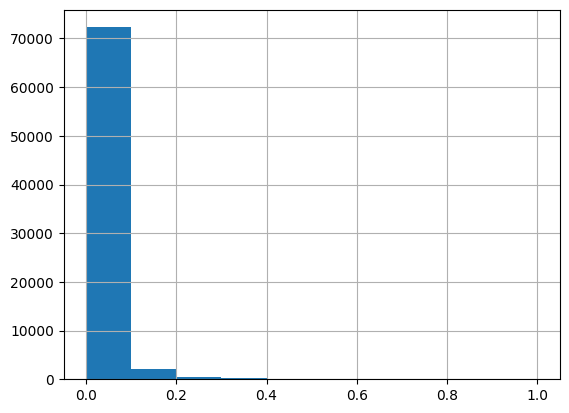

In [99]:
data['weekly_average_tx_count_of_recipient'].hist()

<Axes: >

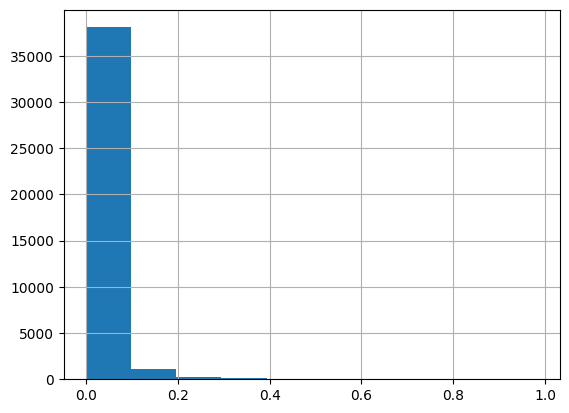

In [100]:
df_generated['weekly_average_tx_count_of_recipient'].hist()

# Predict and evaluate